**Disclaimer:**
To visualize our results, we don't use Julia, but Python, because there is no need for performance optimized code and Python offers a simpler and more convenient way to work with data.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
sns.set_palette("pastel")

In [28]:
results_general = pd.read_csv("../results/results.csv")
results_distributed = pd.read_csv("../results/distributed_results.csv")
results = pd.concat([results_general, results_distributed])

In [29]:
results["n_busses"] = results["file"].str.split("ieee", expand=True)[1].str.split("cdf", expand=True)[0].astype(int)
results = results.drop(columns="file")

In [31]:
results = results.sort_values("n_busses")
results

,method,elapsed,objective,has_converged,n_busses
1,distributed,5.573172,9065.062735,True,14
3,ADMM-single-threaded,6.583000,9065.075748,True,14
4,ADMM-multi-threaded,1.590000,9065.075748,True,14
5,simple-lp,0.001000,9065.000000,True,14
9,ADMM-single-threaded,31.545000,9919.016679,True,30
11,simple-lp,0.001000,9919.000000,True,30
3,distributed,20.912242,9919.099733,True,30
10,ADMM-multi-threaded,9.618000,9919.016679,True,30
4,distributed,54.505341,43778.105341,True,57
12,ADMM-single-threaded,78.640000,43778.000966,True,57


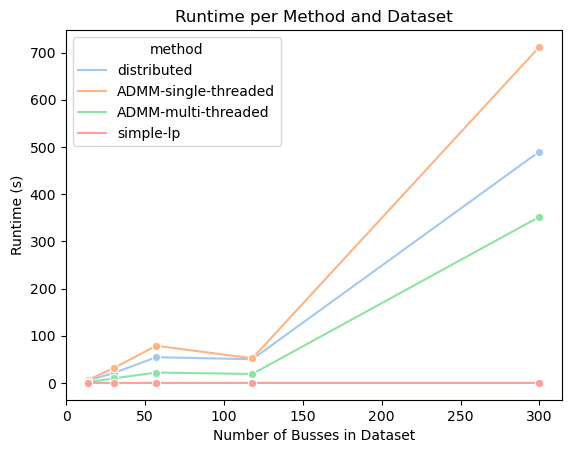

In [46]:
fig, ax = plt.subplots()

sns.lineplot(
    results,
    x="n_busses",
	y="elapsed",
    hue="method",
    marker="o",
    ax=ax
)
ax.set_title("Runtime per Method and Dataset")
ax.set_ylabel("Runtime (s)")
ax.set_xlabel("Number of Busses in Dataset")

plt.savefig("../assets/benchmark.png", dpi=300)
plt.show()